In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

## Normalization ##
**"In the simplest cases, normalization of ratings means adjusting values measured on different scales to a notionally common scale"**
... Wikipedia

## Min-Max Normalization ##
*Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.* 

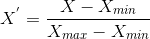

## Z-score Normalization ##
Unlike the Min-Max Normalization this normalization doesn't focus on reducing the value points to [0 .. 1].
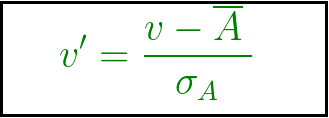
σA, A is the standard deviation and mean of A respectively.


## Decimal Scale Normalization ##
To normalize by decimal scaling:
- Find the largest number in the given range
- Count the number of digits in the largest number, say i
- Divide each number by 10 ^ i

1. Suppose that the data for analysis includes the attribute age. The age values for the data tuples are (in increasing order) 13, 15, 16, 16, 19, 20, 20, 21, 22, 22, 25, 25, 25, 25, 30, 33, 33, 35, 35, 35, 35, 36, 40, 45, 46, 52, 70.


In [2]:
data = [13, 15, 16, 16, 19, 20, 20, 21, 22, 22, 25, 25, 25, 25, 30, 33, 33, 35, 35, 35, 35, 36, 40, 45, 46, 52, 70]

(a) Use min-max normalization to transform the values of age to the range [0:1].

In [3]:
minimum = min(data)
maximum = max(data)
normalized_data = [(value - minimum) / (maximum - minimum) for value in data]
print(*normalized_data, sep= '\t\t\t')

0.0			0.03508771929824561			0.05263157894736842			0.05263157894736842			0.10526315789473684			0.12280701754385964			0.12280701754385964			0.14035087719298245			0.15789473684210525			0.15789473684210525			0.21052631578947367			0.21052631578947367			0.21052631578947367			0.21052631578947367			0.2982456140350877			0.3508771929824561			0.3508771929824561			0.38596491228070173			0.38596491228070173			0.38596491228070173			0.38596491228070173			0.40350877192982454			0.47368421052631576			0.5614035087719298			0.5789473684210527			0.6842105263157895			1.0


(b) Use z-score normalization to transform the values of age.

In [4]:
mean = np.mean(data)
std_dev = np.std(data)
z_norm_data = [(value - mean) / std_dev for value in data]
print(*z_norm_data, sep= '\t\t\t')

-1.3356459850221374			-1.1781680741243308			-1.0994291186754275			-1.0994291186754275			-0.8632122523287176			-0.7844732968798143			-0.7844732968798143			-0.705734341430911			-0.6269953859820077			-0.6269953859820077			-0.39077851963529775			-0.39077851963529775			-0.39077851963529775			-0.39077851963529775			0.0029162576092187234			0.23913312395592862			0.23913312395592862			0.3966110348537352			0.3966110348537352			0.3966110348537352			0.3966110348537352			0.4753499903026385			0.7903058120982517			1.1840005893427683			1.2627395447916716			1.7351732774850914			3.152474475565351


(c) Use normalization by decimal scaling to transform the values of age such that the transformed value is less than 1.

In [5]:
 i = len(str(maximum))
dec_scale_data = [value / (10 ** i) for value in data]
print(*dec_scale_data, sep= '\t\t\t')

0.13			0.15			0.16			0.16			0.19			0.2			0.2			0.21			0.22			0.22			0.25			0.25			0.25			0.25			0.3			0.33			0.33			0.35			0.35			0.35			0.35			0.36			0.4			0.45			0.46			0.52			0.7


---


2. Use the given dataset and perform the operations listed below.

**Dataset Description**

It is a well-known fact that Millenials LOVE Avocado Toast. It's also a well known fact that all Millenials live in their parents basements. Clearly, they aren't buying home because they are buying too much Avocado Toast! But maybe there's hope... if a Millenial could find a city with cheap avocados, they could live out the Millenial American Dream. Help them to filter out the clutter using some pre-processing techniques.

Some relevant columns in the dataset:
- Date - The date of the observation
- Average Price - the average price of a single avocado
- type - conventional or organic
- year - the year
- Region - the city or region of the observation
- Total Volume - Total number of avocados sold
- 4046 - Total number of avocados with PLU* 4046 sold
- 4225 - Total number of avocados with PLU* 4225 sold
- 4770 - Total number of avocados with PLU* 4770 sold
(Product Lookup codes (PLU’s)) *

In [6]:
data = pd.read_csv(filepath_or_buffer= "./Avocado Dataset.csv")
data

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,29-11-2015,1.29,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18245,28-01-2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,21-01-2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,14-01-2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,07-01-2018,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [7]:
# proof that there was a duplicate record
new = []
for i in range(len(data)):
    if data['Date'].iloc[i] == '18-03-2018' and data['AveragePrice'].iloc[i] == '1.56':
        new.append(data.iloc[i])
new        

[Date                  18-03-2018
 AveragePrice                1.56
 Total Volume             15896.4
 4046                     2055.35
 4225                     1499.55
 4770                           0
 Total Bags               12341.5
 Small Bags               12114.8
 Large Bags                226.67
 XLarge Bags                    0
 type                     organic
 year                        2018
 region          WestTexNewMexico
 Name: 18238, dtype: object,
 Date                  18-03-2018
 AveragePrice                1.56
 Total Volume             15896.4
 4046                     2055.35
 4225                     1499.55
 4770                           0
 Total Bags               12341.5
 Small Bags               12114.8
 Large Bags                226.67
 XLarge Bags                    0
 type                     organic
 year                        2018
 region          WestTexNewMexico
 Name: 18249, dtype: object]

In [8]:
# remove duplicates
# data.drop_duplicates()

1. Sort the attribute “Total Volume” in the given dataset and distribute the data into equal sized/frequency bins. Let the number of bins be 250. Smooth the sorted data by
    - bin-means
    - bin-medians
    - bin-boundaries

### Binning Method ###
Binning method is used to smoothing data or to handle noisy data. In this method, the data is first sorted and then the sorted values are distributed into a number of buckets or bins. As binning methods consult the neighborhood of values, they perform local smoothing.
1. Bin-Mean: Replacing the data values within a bin by the mean of the data in the bin
2. Bin-Median: Replacing the data values within a bin by the median of the data in the bin
3. Bin-Boundary: Replace the data by either of the boundary values, lower or upper, choosen by a decided measure of distance.


In [9]:
vol_arr = sorted(np.array(data['Total Volume']))
min_vol = vol_arr[0]
max_vol = vol_arr[-1]
n_bins = 250
bins = list(np.arange(round(min_vol, -3), round(max_vol, -3), (round(max_vol, -4) - round(min_vol, -4)) / n_bins))
bins.append(bins[-1] + (bins[1] - bins[0]))

In [10]:
def binning(bins, data):
    bin_index = 1
    bin_mean = []
    bin_median = []
    bin_boundary = []
    i = 0
    length = len(data)
    while i < length:
        bin_elements = []
        while i < length:
            if bins[bin_index] >= data[i]:
                bin_elements.append(data[i])
                i += 1
            else:
                break
        if bin_elements == []:
            bin_index += 1
            continue
        mean = np.mean(bin_elements)
        median = np.median(bin_elements)
        count = len(bin_elements)
        bin_mean.extend([mean] * count)
        bin_median.extend([median] * count)
        for element in bin_elements:
            if element - bin_elements[0] > bin_elements[-1] - element:
                bin_boundary.append(bin_elements[-1])
            else:
                bin_boundary.append(bin_elements[0])
        bin_index += 1
    return bin_mean, bin_median, bin_boundary

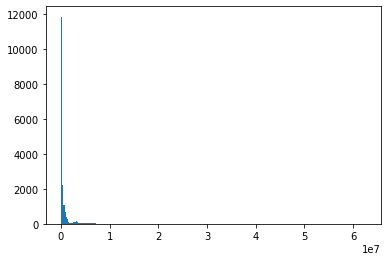

In [11]:
bin_mean, bin_median, bin_boundary = binning(bins, vol_arr)
plt.hist(bin_mean, bins= bins)
plt.show()

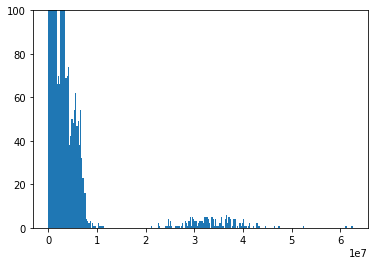

In [12]:
plt.hist(bin_mean, bins= bins)
plt.ylim(0, 100)
plt.show()

Due to improper frequency distribution even after smoothing the data using binning methods curve still remains biased in the first few bin contain most of the data.

2. The dataset represents weekly retail scan data for National retail volume (units) and price. However, the company is interested in knowing the monthly (total per month) and annual sales (total per year), rather than the total per week. So, reduce the data accordingly.


In [13]:
month_mean = {}
year_mean = {}
for i in data.index:
    month = data.Date[i][3:]
    year = data.year[i]
    if month in month_mean:
        month_mean[month].append(data['Total Volume'][i])
    else:
        month_mean[month] = [data['Total Volume'][i]]
    if year in year_mean:
        year_mean[year].append(data['Total Volume'][i])
    else:
        year_mean[year] = [data['Total Volume'][i]]

for num in year_mean:
    year_mean[num] = sum(year_mean[num]) / len(year_mean[num])
for code in month_mean:
    month_mean[code] = sum(month_mean[code]) / len(month_mean[code])

3. Summarize the number of missing values for each attribute

In [14]:
# Data format: number-number-number and length of string = 10
check_date = lambda x: len(x) == 10 and re.match(r'[0-9]+-[0-9]+[0-9]', x)
# the regex structure is 'numeric.numeric' = float or  'numeric' = float hence the function is_number
is_number = lambda x: re.match(r'[+-]?[0-9]+\.?[0-9]*', str(x))
# the regex structure is '[alphabets]' = string -- non-empty strings
is_str = lambda x: re.match(r'[A-Za-z]+', x)

In [15]:
# date check
count_improper = dict()
count_improper['Date'] = len([True for x in data.Date if check_date(x) == False])
count_improper['Date']

0

In [16]:
# Average Price Check
count_improper['AveragePrice'] = len([True for x in data.AveragePrice if is_number(x) is None])
count_improper['AveragePrice']

48

In [17]:
# total volume Check 
count_improper['Total Volume'] = len([True for x in data['Total Volume'] if is_number(x) is None])
count_improper['Total Volume']

0

In [18]:
# 4046	4225	4770
count_improper['4046'] = len([True for x in data['4046'] if is_number(x) is None])
count_improper['4225'] = len([True for x in data['4225'] if is_number(x) is None])
count_improper['4770'] = len([True for x in data['4770'] if is_number(x) is None])
count_improper

{'Date': 0,
 'AveragePrice': 48,
 'Total Volume': 0,
 '4046': 0,
 '4225': 0,
 '4770': 0}

In [19]:
# Total Bags	Small Bags	Large Bags	XLarge Bags check
count_improper['Total Bags'] = len([True for x in data['Total Bags'] if is_number(x) is None])
count_improper['Small Bags'] = len([True for x in data['Small Bags'] if is_number(x) is None])
count_improper['Large Bags'] = len([True for x in data['Large Bags'] if is_number(x) is None])
count_improper['XLarge Bags'] = len([True for x in data['XLarge Bags'] if is_number(x) is None])
count_improper

{'Date': 0,
 'AveragePrice': 48,
 'Total Volume': 0,
 '4046': 0,
 '4225': 0,
 '4770': 0,
 'Total Bags': 0,
 'Small Bags': 0,
 'Large Bags': 0,
 'XLarge Bags': 0}

In [20]:
# type	year	region check
count_improper['type'] = len([True for x in data['type'] if is_str(x) is None])
count_improper['year'] = len([True for x in data['year'] if is_number(x) is None])
count_improper['region'] = len([True for x in data['region'] if is_str(x) is None])
count_improper

{'Date': 0,
 'AveragePrice': 48,
 'Total Volume': 0,
 '4046': 0,
 '4225': 0,
 '4770': 0,
 'Total Bags': 0,
 'Small Bags': 0,
 'Large Bags': 0,
 'XLarge Bags': 0,
 'type': 0,
 'year': 0,
 'region': 0}

4. Populate data for the missing values of the attribute= “Average Price” by averaging all the values of the “Avg Price” attribute that fall under the same “REGION” attribute value.


In [21]:
avg_by_region = dict()
for i in data.index:
    if is_number(data['AveragePrice'][i]):
        if data['region'][i] in avg_by_region:
            avg_by_region[data['region'][i]].append(float(data['AveragePrice'][i]))
        else:
            avg_by_region[data['region'][i]] = [float(data['AveragePrice'][i])]
avg_of_region = {}
for region in avg_by_region:
    avg_of_region[region] = np.nanmean(avg_by_region[region])

In [22]:
avg_data = []
for i in data.index:
    k = data['AveragePrice'][i]
    if is_number(k) == None:
        k = avg_of_region[data['region'][i]]
    avg_data.append(k)
data['AveragePrice'] = avg_data

5. Discretize the attribute= “Date” using concept hierarchy into {Old, New, Recent} (Consider 2015,2016 : Old, 2017: New, 2018: Recent).

In [23]:
data['year'] = data['year'].T.astype(int)

In [24]:
discrete ={
    'Old' : [2015, 2016],
    'New': [2017],
    'Recent': [2018]
}
time_attr = []
for x in data.year:
    if x in discrete['Old']:
        k = 'Old'
    elif x in discrete['New']:
        k = 'New'
    elif x in discrete['Recent']:
        k = 'Recent'
    else:
        k = 'Out of range'
    time_attr.append(k)
data['Hierarchy'] = time_attr
data

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Hierarchy
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,Old
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,Old
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,Old
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,Old
4,29-11-2015,1.29,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,Old
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18245,28-01-2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,Recent
18246,21-01-2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,Recent
18247,14-01-2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,Recent
18248,07-01-2018,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico,Recent
